# Topic Modeling

By Amy Weng

Adapted in part from Heidi Smith's Files (Topic_Model_Attempt_1.ipynb, Word_Clouds.ipynb)

In [14]:
import pandas as pd
import re

import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim.corpora as corpora

In [26]:
# Remove stopwords/preprocess
stop_words = stopwords.words('english')
stop_words.extend(['thus', 'thereof', 'thence', 'thee', 'therein', 
                    'wherein', 'whereby', 'whereas', 'also', 'us', 'upon', 
                    'would', 'within', 'indeed', 'become', 'viz', 'per', 'anno', 
                    'whilst', 'thoe', 'ome', 'uch', 'said', 'shall', 'hath',
                    'may','made','much','one','mr','how','like','full','one',
                    'two','three','four','five','day','say','thou','make','men','man',
                    'done','do','have','well','know','heard','hear',
                    'saying','come','never','time','think','came','till','might',
                    'could','begin','began','took','went','last','matter','seeing',
                    'go','many','few','see','take','found','without','little','long',
                    'put','brought','bring','another','th','aforesaid','old','son',
                    'tell','em','yet','cae','mot','doe','aloe','every','elf',
                    'himelf','thy','de','ch','com','says','part','through','let',
                    'must','sir','tho','away','part','unto','printed','doth',
                    'iq','esq','firt','et','among','everal','ver','called','lt',
                    'every','even','becaue','ibid','de','lib','ch','com','often',
                    'againt','second','dr','though','goes','non','equire',
                    'page','told','hold','sr','ditto','elf','therefore','de',
                    'ps','six','ent','mr','inits','ee','ay','mut','almost',
                    'concerning'])
        
def remove_stopwords(data):
    return [[word for word in simple_preprocess(str(doc))
            if word not in stop_words] for doc in data]

In [29]:
# lexicons
publica = "adventurers|aid|ally|ambaador|ambassador|amboyna|amsterdam|argier|army|austerity|authority|bank|banks|bantam|bill|bills|body politic|bond|britain|bullion|bullionist|charles|china|chocolate|christiandom|cinnamon|civil war|civilian|coffee|coin|commerce|commercial|commodities|commodity|commonwealth|company|constitution|consumables|consume|consumer|consuming|consumption|controversies|controversy|copper|corn|corporate|corporation|country|credit|creditor|crisis|crisis|currency|debt|debtor|decoctor|decree|decrees|defendant|dutch|duties|east india company|east indies|east-india company|east-india-company|eat-india company|economic|economy|empire|employment|enemy|england|england|estate|exchange|exchequer|exportation|extortion|factory|fih|fihing|fiscal|fish|fishery|fishing|foreign|free trade|germany|ginger|gold|goods|government|governor|herring|hillings|holy roman empire|house of commons|house of lords|importation|income|india|india|indian|indies|indonesia|industry|interest|interest rate|interest rates|interet|ireland|james|joint-stock|king|kingdom|kingdom|land|law|laws|london|lord|low countries|majesty|mary|massacre|mercantile|merchandise|merchant|merchants|military|money|monies|monopolie|monopolies|monopolion|monopolist|monopolium|monopolization|monopolize|monopolizer|monopolizes|monopoly|monopolye|monopolyes|mughal|nation|national|navy|netherlands|netherlands|oppression|parliament|parliament|pay|pence|pences|pepper|pirate|pirates|plaintiff|pleads|politic|political|pound|pounds|power|price|prices|prince|privileges|profitable|property|protection|provincial|public|publicke|queen|quote|restoration|revenue|revolution|ruler|scandal|scandalous|scotland|shilling|shillings|ships|siam|silk|silver|spanish|spending|spices|spices|sterling|stock|strength|stuart|subject|substance|taxation|taxes|tea|textiles|tobacco|tories|tory|trade|traffic|traffique|treasure|treatise|treatises|tunis|turkish|unprofitable|usurer|usury|war|whig|whigs|william|work|interlopers|interloper|planters|manufacture|manufacturing|courts|court|hollanders|tradesmen|creditors|factories|princes|companies|african|africa|proecutors|seamen|proecutor|spain|emperor|shipping|clothier|clothiers|manufacturers|conumption|conume|moneys|proclamation|abroad|treaty|treaties|courten|nets|wood|negroes|bavaria|manufactures|petitioners|petitioner|bankrupts|gunpowder|governors|bankrupt|salt|plantations|coined|mint|minted|license|licensing|licenser|supply|admiral|calico|calicoes|revenues|mines|saltpetre|petre|cent|cents|prohibition|siam|syam|phaulkon|woollen|commissioner|commiioner|act|majesties|majeties|europe|european|kings|charters|grant|grants|solicitors|council|councils|mogul|captain|cargo|cargoes|proprietors|administrators|trading|indenture|truces|market|markets|herrings|naval|navigation|commissioners|cloths|imported|exported|citizens"
religio = 'abnegatio|abraham|absolution|abundance|adam|adultery|almighty|altar|anathema|annihilate|anoint|anointing|antichrist|apocalypse|apostle|archangel|armageddon|arrogant|ascension|atone|atonement|avarice|baptism|bathsheba|bible|biblical|bishop|blasphemy|bless|blessed|blessing|born-again|bread|brother|caesar|calvinist|candles|canon|catholic|cessans|chalice|chapel|chaplain|charity|cheat|cheating|cherub|christ|christian|christianity|church|cleansing|coming|commandments|communion|condemn|condemnation|confess|confession|congregation|conscience|consecration|contempt|contrite|contrition|conviction|covenant|create|creation|creed|cross|crown|cuckold|curse|damask|damn|damnation|damned|david|day|deacon|death|deceit|deceitful|deceive|deceive|defile|defiled|delilah|demon|depravity|desire|desires|destruction|deuteronomy|devil|disciple|disciples|disobey|divine|doctrine|ecumenical|endure|entice|enticed|epistle|eternal|evangelical|evangelicalism|eve|evil|excommunication|exile|exodus|faith|false|falsehood|fellowship|forgive|forgiveness|fortune|fraud|freedom|fundamental|generation|genesis|gentile|gluttony|god|godly|gospel|grace|greed|green|grievance|guilt|guilty|hallelujah|heaven|hebrew|hebrews|hell|heresy|heresy|holiness|holy|human|hypocrisy|incest|indulgence|indulgent|integrity|isaiah|james|jehovah|jesus|job|judaism|judgment|justification|justify|knowledge|lechery|leviticus|lie|lies|liturgy|lord|lucifer|lucrum|luke|lust|lustful|lustfully|luxury|manifestation|mark|mass|matthew|mendicancy|messiah|ministry|mission|missionary|modesty|moral|moses|obedience|obey|offering|offerings|ordained|ordinance|ordinate|ordination|orthodox|pagan|paganism|pagans|palace|papacy|papist|parable|parables|parish|parishioner|passover|pastor|penance|perfect|persecution|peter|pleasant|pope|popery|pray|prayer|predestination|pride|priesthood|prodigal|prodigality|prophecy|prophet|protestant|proverb|proverbs|providence|psalm|psalms|purgatory|radiance|rapture|reap|reconcile|reconciliation|redeem|redeemed|redemption|reform|reformed|reincarnate|reincarnation|reject|rejected|rejoice|rejoiced|religion|render|repent|resurrect|resurrection|revelation|rich|righteous|righteousness|ritual|roman|rome|root|sabbath|sacrament|sacred|sacrifice|sacrifices|saint|salvation|samaritan|samson|samuel|sanctified|sanctify|sanctuary|satan|satanic|satanism|save|saved|saved|savior|scripture|scriptures|second|secure|security|self-denial|sermon|simony|sin|sinful|sister|slave|slaves|sloth|soul|sown|spirit|splendor|splendor|station|stations|sumptuary|sun|supper|tempt|ten|tenant|tenants|testament|theft|thrive|timothy|tongues|tower|transgression|tribulation|trinity|trust|truth|twelve|unfaithful|union|universal|unnatural|vanity|velvet|venial|virgin|vision|vulgate|wealth|whore|wicked|wickedness|wine|wise|witness|word|words|worship|zion|presbyterians|presbyterian|prohibition|anabaptists|prejudicial|chrit|clergy|minister|sins|bishop|bishops'
medica = 'asthma|asthma|atrophy|bad|bezoar|bile|bleed|bleeding|blood|body|brain|breathing|cancer|canker|circulate|circulation|clots|clotting|cold|constitution|consume|consumption|contamination|corpora|corpus|corrupt|corruptio|corruption|corruptionem|cough|cure|cured|dead|death|decay|decay|deceased|defect|degenerate|degeneration|destroy|diabetes|diagnosis|disease|dissolution|distemper|drinks|dry|dying|enfeeblement|envy|evacuation|exercise|faculties|fatal|fatality|fever|fiber|fog|healthy|heart|hemorrhage|hepatitis|herb|herbs|hot|hysteria|illness|impairment|inanition|insane|jealousy|languish|leech|leeches|liver|lung|malaria|medical|medicine|melancholy|miasma|mind|moist|morbid|mortal|mortality|mouth|nerves|nervous|opiate|opium|perversion|perverto|phlegm|physician|plague|plague|pox|prognosis|putrid|putrid|remedies|remedy|sana|sane|sanguine|sick|sickness|smells|smoke|sores|spirit|spoil|spoiling|stomach|supple|surgeon|surgeons|swelling|tetrid|therapeutic|tuberculosis|ulcer|unhealthy|unwholesome|upset|vein|vein|vessels|vice|vita|vital|vitiare|vitiation|vitium|vomit|waste|wasting|wholesome|wintergreen|zodiac|physicians|medicines|patients|patient|apothecary|apothecaries|phyician|phyicians'

pub = re.compile(publica)
rel = re.compile(religio)
med= re.compile(medica)

In [ ]:
def alphabetize(lexicon,name):
    string = '|'.join(sorted(lexicon.split('|')))
    print(name+' = '+'\''+string+'\'')

In [11]:
def model(df):
    data = df.text.values.tolist()
    data = remove_stopwords(data)

    id2word = corpora.Dictionary(data)
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data]
    num_topics = 1
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
    for idx, topic in lda_model.show_topics(formatted=False, num_words= 10):
        return ('{}'.format(' '.join([w[0] for w in topic])))

def sortByTopics(topics):

    p = len(re.findall(pub, topics))/10
    r = len(re.findall(rel, topics))/10
    m = len(re.findall(med, topics))/10

    maxRatio = max(p,r,m)

    if maxRatio==0:
        return 'altera'  
    elif p==maxRatio: 
        return 'publica'
    elif r==maxRatio:
        return 'religio'
    else:
        return 'medica'

def save(directory, topics,folder,f_name):
    name = f_name.rsplit('.', 1)[0]
    txtFile = directory+'topic model/'+folder+'/'+name+'.txt'
    w = open(txtFile,'a+')
    w.write(topics+'\n')
    w.close()

In [30]:
def topicModel(directory, f_name,folder):
    myCSV = directory + folder + f_name

    df_p = pd.DataFrame(columns=('title','author','publisher','date','text'))
    df_r = pd.DataFrame(columns=('title','author','publisher','date','text'))
    df_m = pd.DataFrame(columns=('title','author','publisher','date','text'))
    df_a = pd.DataFrame(columns=('title','author','publisher','date','text'))

    # Read in csv
    readFile = pd.read_csv(myCSV)

    # Iterate over each text (row) in csv
    for i in range(len(readFile.index)):
        
        df = readFile[i:(i+1)]
        
        topics = model(df)
        
        t = sortByTopics(topics)
        
        save(directory, topics,t,f_name)

        if t=='publica':
            df_p = df_p.append(df)
        
        elif t=='religio':
            df_r = df_r.append(df)
        
        elif t=='medica':
            df_m = df_m.append(df)
        
        else:
            df_a = df_a.append(df)

        if (i != 0) & (i % 100 == 0):
            print(i) 
        
    if not df_p.empty:    
        df_p.to_csv(directory+'topic model/publica/'+f_name) 
        print("Publica: ",len(df_p))

    if not df_r.empty:    
        df_r.to_csv(directory+'topic model/religio/'+f_name)
        print("Religio: ",len(df_r))

    if not df_m.empty:    
        df_m.to_csv(directory+'topic model/medica/'+f_name)
        print("Medica: ",len(df_m))

    if not df_a.empty:    
        df_a.to_csv(directory+'topic model/altera/'+f_name)
        print("Altera: ",len(df_a))


In [31]:
directory = '/home/rapiduser/Materials/'

topicModel(directory,'eic.csv','Texts/')

Publica:  452
Religio:  24
Medica:  3
Altera:  5


In [32]:
topicModel(directory,'monopoly.csv','Texts/')

Publica:  439
Religio:  320
Medica:  13
Altera:  20


In [33]:
topicModel(directory,'eic_monopoly.csv','Texts/')

Publica:  86
Religio:  1


In [52]:
# visualize topics 
# Code adapted from Word_Clouds.ipynb
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

def topicCloud(folder,f_name,title):
    txtFile = directory+'topic model/'+folder+'/'+f_name
    w = open(txtFile,'r')
    words = []
    for line in w.readlines():
        line = line.replace('\n','')
        newlist = line.split(' ')
        words.extend(newlist)

    # Count most common words
    word_counts = Counter(words)
    # Top word frequencies
    print(word_counts.most_common(100))
    
    # Print Wordcloud
    word_cloud = WordCloud(stopwords=stop_words, background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(word_counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    

[('trade', 67), ('company', 54), ('great', 48), ('india', 39), ('stock', 26), ('money', 20), ('nation', 18), ('king', 16), ('east', 14), ('england', 13), ('parliament', 12), ('people', 12), ('joint', 11), ('goods', 11), ('good', 11), ('eat', 10), ('manufactures', 10), ('dutch', 10), ('hall', 9), ('act', 9), ('ships', 8), ('coin', 8), ('new', 8), ('aid', 7), ('companies', 7), ('interest', 7), ('others', 6), ('subjects', 6), ('law', 6), ('power', 6), ('merchants', 6), ('cloth', 6), ('present', 6), ('gold', 5), ('interet', 5), ('several', 5), ('value', 5), ('state', 5), ('laws', 5), ('wool', 5), ('public', 5), ('silks', 5), ('lord', 5), ('charters', 4), ('charter', 4), ('silver', 4), ('wou', 4), ('proportion', 4), ('cent', 4), ('st', 4), ('calicoes', 4), ('commodities', 4), ('house', 4), ('mogul', 4), ('stocks', 4), ('english', 4), ('author', 4), ('trades', 4), ('right', 3), ('whole', 3), ('years', 3), ('case', 3), ('bank', 3), ('land', 3), ('credit', 3), ('woollen', 3), ('merchant', 3), 

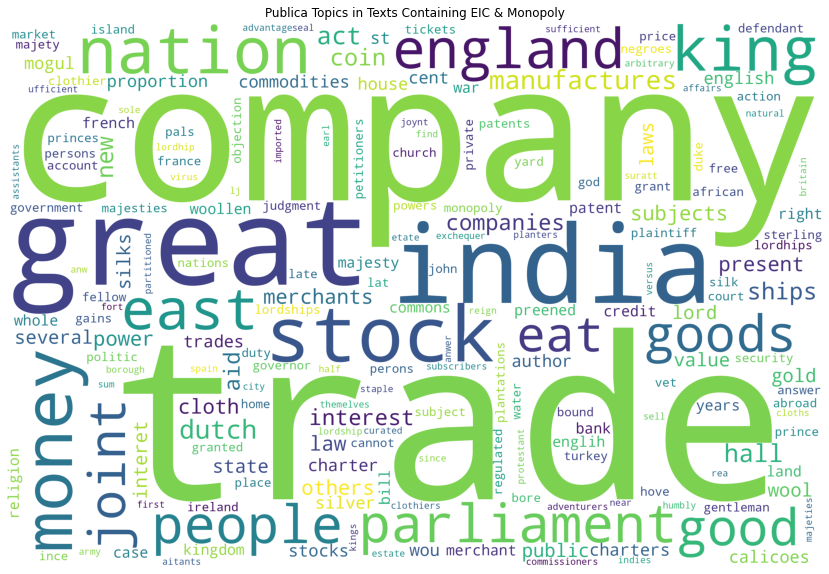

In [53]:
topicCloud('publica','eic_monopoly.txt','Publica Topics in Texts Containing EIC & Monopoly')

[('love', 9), ('great', 8), ('good', 6), ('world', 5), ('nothing', 5), ('rather', 5), ('self', 5), ('wit', 4), ('cannot', 4), ('give', 4), ('others', 4), ('first', 4), ('hall', 3), ('women', 3), ('things', 3), ('nature', 3), ('thing', 3), ('neither', 3), ('themelves', 2), ('ut', 2), ('nec', 2), ('ad', 2), ('neqe', 2), ('vel', 2), ('pro', 2), ('mi', 2), ('virtue', 2), ('tree', 2), ('fruit', 2), ('water', 2), ('sea', 2), ('trees', 2), ('palme', 2), ('nile', 2), ('ethiopia', 2), ('drink', 2), ('fight', 2), ('roger', 2), ('enter', 2), ('peace', 2), ('humphrey', 2), ('shab', 2), ('favour', 2), ('lover', 2), ('kindness', 2), ('eyes', 2), ('bub', 2), ('ant', 2), ('ruf', 2), ('saline', 2), ('gorge', 2), ('oh', 2), ('whose', 2), ('lucrece', 2), ('javota', 2), ('sex', 1), ('wou', 1), ('ue', 1), ('kind', 1), ('times', 1), ('sum', 1), ('thour', 1), ('latin', 1), ('est', 1), ('cum', 1), ('sed', 1), ('whole', 1), ('face', 1), ('converation', 1), ('name', 1), ('thinks', 1), ('red', 1), ('atrophil', 1

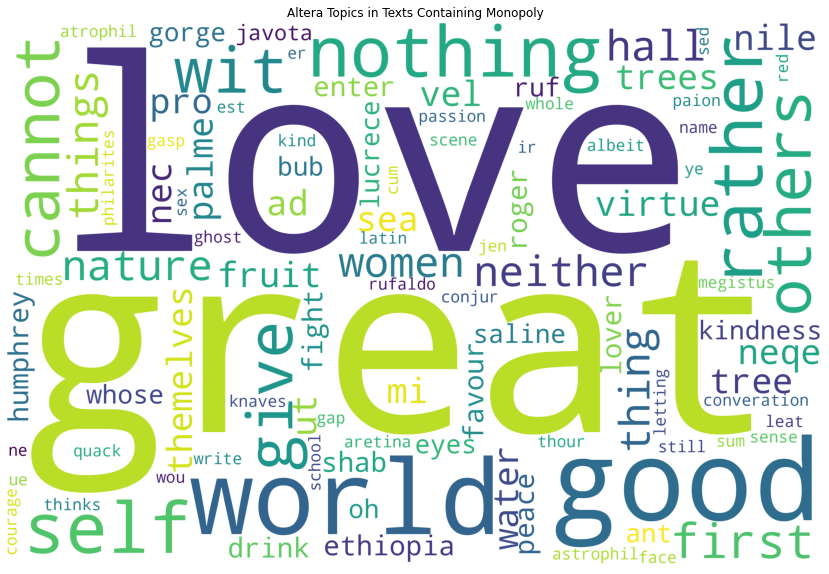

In [54]:
topicCloud('altera','monopoly.txt',"Altera Topics in Texts Containing Monopoly")

[('great', 196), ('king', 187), ('trade', 112), ('people', 95), ('good', 88), ('england', 88), ('parliament', 85), ('company', 72), ('hall', 69), ('law', 67), ('god', 62), ('power', 59), ('money', 47), ('nation', 45), ('india', 43), ('aid', 42), ('laws', 42), ('act', 39), ('government', 37), ('first', 36), ('church', 33), ('lord', 32), ('public', 30), ('stock', 28), ('land', 28), ('kings', 28), ('kingdom', 27), ('house', 25), ('bill', 25), ('religion', 24), ('majesty', 22), ('manufactures', 22), ('others', 21), ('case', 21), ('english', 21), ('court', 20), ('queen', 20), ('things', 18), ('right', 17), ('goods', 17), ('subjects', 17), ('interest', 17), ('city', 17), ('prince', 17), ('state', 16), ('commons', 16), ('new', 16), ('army', 16), ('war', 16), ('plantations', 15), ('french', 15), ('east', 15), ('france', 15), ('london', 14), ('themelves', 14), ('bank', 14), ('country', 14), ('hove', 14), ('statute', 14), ('cloth', 14), ('lords', 14), ('years', 13), ('duke', 13), ('merchants', 1

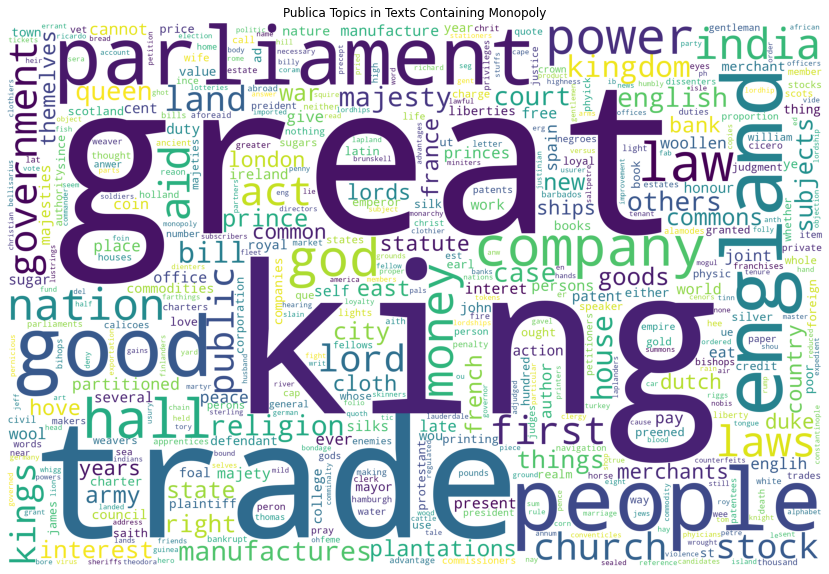

In [55]:
topicCloud('publica','monopoly.txt','Publica Topics in Texts Containing Monopoly')

[('god', 247), ('great', 140), ('good', 126), ('church', 102), ('lord', 81), ('world', 73), ('christ', 68), ('things', 62), ('religion', 59), ('hall', 58), ('holy', 48), ('people', 47), ('first', 45), ('love', 44), ('chrit', 42), ('life', 40), ('faith', 38), ('ever', 36), ('self', 31), ('king', 29), ('spirit', 28), ('heaven', 28), ('pope', 27), ('soul', 26), ('death', 25), ('heart', 24), ('rome', 23), ('true', 22), ('thing', 20), ('gods', 19), ('others', 19), ('ye', 18), ('sin', 17), ('nothing', 16), ('word', 16), ('truth', 16), ('cannot', 15), ('themelves', 15), ('st', 15), ('power', 15), ('grace', 15), ('way', 14), ('law', 14), ('whole', 13), ('bishop', 12), ('saith', 12), ('scripture', 11), ('words', 11), ('er', 10), ('bishops', 10), ('honour', 10), ('divine', 10), ('either', 10), ('state', 10), ('nature', 9), ('jesus', 9), ('sins', 9), ('worship', 9), ('work', 9), ('clergy', 9), ('body', 8), ('blood', 8), ('souls', 8), ('eyes', 8), ('whose', 8), ('oh', 8), ('wine', 7), ('aid', 7), 

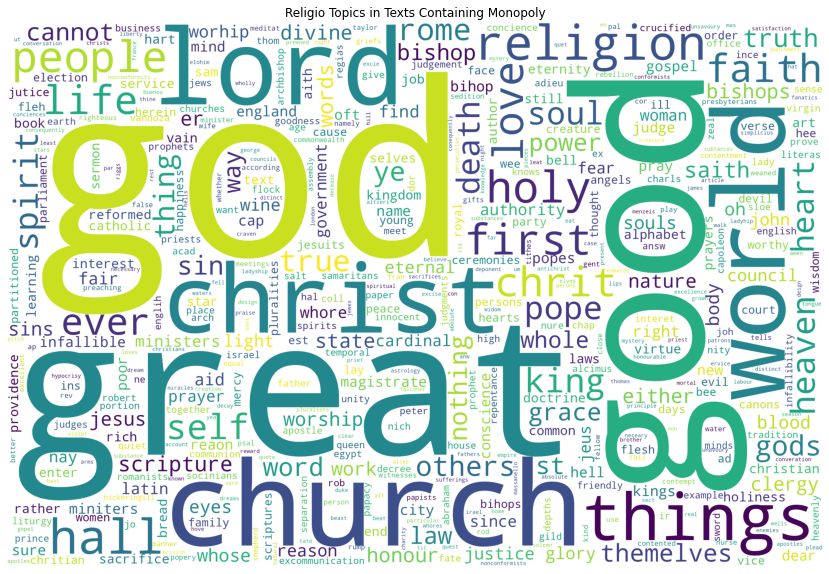

In [56]:
topicCloud('religio','monopoly.txt',"Religio Topics in Texts Containing Monopoly")

In [20]:
def examine(folder,f_name):
    txtFile = directory+'topic model/'+folder+'/'+f_name
    w = open(txtFile,'r')
    words = []
    for line in w.readlines():
        line = line.replace('\n','')
        newlist = line.split(' ')
        words.extend(newlist)

    unique = set()
    unique.update(words)

    m = ' '.join(medica.split('|'))
    r = ' '.join(religio.split('|'))
    p = ' '.join(publica.split('|'))
    a = []
    for word in unique:
        if (re.search(word,p)==None) and (re.search(word,r)==None) and (re.search(word,m)==None):
            a.append(word)
    w.close()
    print(a)

In [ ]:
examine('publica','eic.txt')

In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim_models
# # Visualize the topics
# pyLDAvis.enable_notebook()
# LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
# pyLDAvis.save_html(LDAvis_prepared, results+'/post-restoration.html')
# LDAvis_prepared
